Brainstorm data sources
Metro stations
Weather
Popularity (instagram checkins)
Altitude
Crime
Population data (migration)
Employers
Distance to a McDonald
Whatever distance
Cluster similar housing prices
Closest green areas
Traffic (big roads)
Noise
Politics 
Ethnicity
Age
Supermarkets

Plan:
find exploratory question + backup
See what data would most relevant based on brainstorm
Get data (API, scraping, whatever)
Clean data, preliminary analysis
Make model(s) for prediction question
Make model for exploratory question

In [1]:
import pandas as pd

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Households Data.csv')

In [4]:
cols=df.columns.tolist()

In [5]:
old_tags=['Hogar',
    'EXCLUIR',
    'paraValidacion',
    'Sector',
    'DirCoordX',
    'DirCoordY',
    'MontoArr',
    'IngresoHogar',
    'Factor',
    'AnosEstudio',
    'CLASE',
    'Sup_Prom_Constr_Hab_EOD',
    'Calid_EOD_norm_inv',
    'DensConstr_EOD',
    'Dist_est_Metro_MC_KM',
    'Dist_salida_Autop_MC_KM',
    'Tiempo_Com_Stgo',
    'Ingreso_Promedio_Zona_MM',
    'Acc_Comercio_tpte_pub',
    'Acc_Educacion_tpte_pub',
    'Acc_Habitacion_tpte_pub',
    'Acc_Industria_tpte_pub',
    'Acc_Servicios_tpte_pub',
    'Acc_Comercio_auto',
    'Acc_Educacion_auto',
    'Acc_Habitacion_auto',
    'Acc_Industria_auto',
    'Acc_Servicios_auto',
    'CLUSTER7',
    'CLUSTER2']

new_tags=['household_id',
    'excluded',
    'validation',
    'sector',
    'coord_x',
    'coord_y',
    'rent',
    'income_household',
    'factor',
    'education_years',
    'CLASS',
    'built_surface_in_zone',
    'construction_quality_in_zone',
    'built_density_of_zone',
    'dist_metro',
    'dist_highway',
    'duration_cbd',
    'income_zonal',
    'accessibility_transit_commerce',
    'accessibility_transit_education',
    'accessibility_transit_habitation',
    'accessibility_transit_industry',
    'accessibility_transit_service',
    'accessibility_car_commerce',
    'accessibility_car_education',
    'accessibility_car_habitation',
    'accessibility_car_industry',
    'accessibility_car_service',
    'cluster7',
    'cluster2']

rename=dict()
for c,i in enumerate(old_tags):
    rename[i]=new_tags[c]

In [6]:
df.rename(columns=rename,inplace=True)

In [7]:
df = df[df.excluded == 0]

In [8]:
df['household_id'].min()

100010

See if the features are categorical or continuous

If there is a range behind them, it has more than 25 different values meaning it is continuous

In [9]:
unique={}
not_unique={}
for i in new_tags:
    if len(df[i].unique()) <25:
        unique[i]=df[i].unique()
        print(i, df[i].unique())
    else:
        not_unique[i]=[df[i].min(),df[i].max()]
        print(i+'_range', df[i].min(),df[i].max())

household_id_range 100010 743823
excluded [0]
validation [0]
sector [7 5 2 1 4 3 6]
coord_x_range 290184.6872 363829.8472
coord_y_range 6257254.642000001 6327802.283
rent_range 10000 5000000
income_household_range 0 13000000
factor_range 5.151379 927.142761
education_years [11 10 14 12  9 15 17  8 16  6  7  5  0 13  4 18 19 21 22 24 20 23]
CLASS [1 2 3]
built_surface_in_zone_range 0.0 207.3
construction_quality_in_zone [0.98 1.   0.78 0.93 0.55 0.   0.36]
built_density_of_zone_range 0.0 4.599
dist_metro_range 0.020794341 49.8443251
dist_highway_range 0.012117453 13.61858197
duration_cbd_range 2 202
income_zonal_range 0.147514 4.957229
accessibility_transit_commerce_range 46.22676 6096.1181
accessibility_transit_education_range 23.40312 3151.93234
accessibility_transit_habitation_range 374.87856 44854.37616
accessibility_transit_industry_range 33.55359 4536.55703
accessibility_transit_service_range 56.47495 7713.39615
accessibility_car_commerce_range 1048.44 8583.06
accessibility_car_ed

having a look at the data...

/home/stef/Desktop/assignment/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


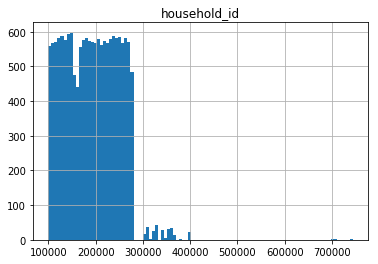

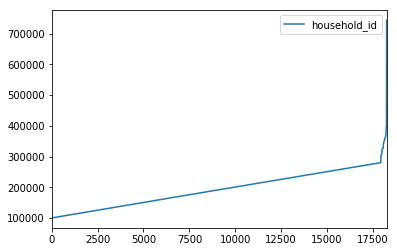

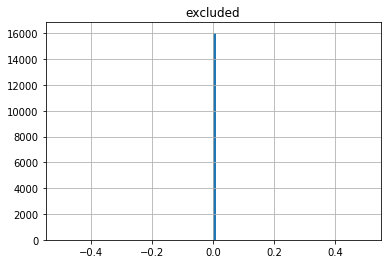

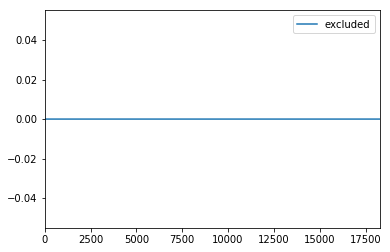

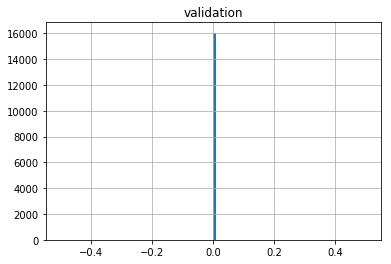

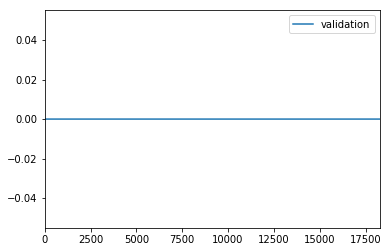

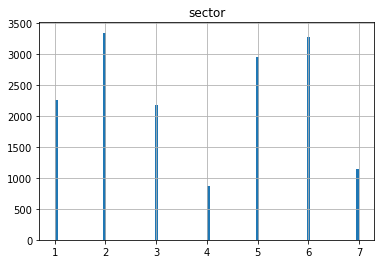

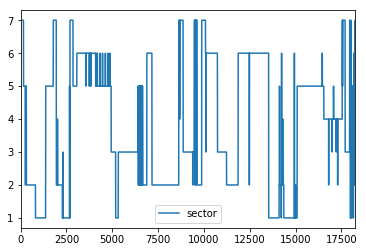

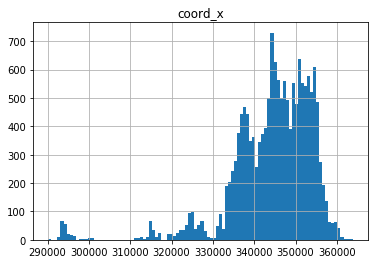

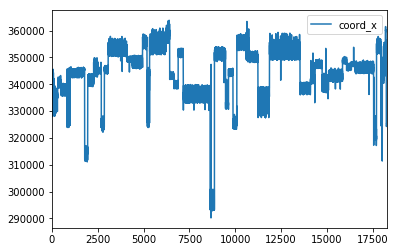

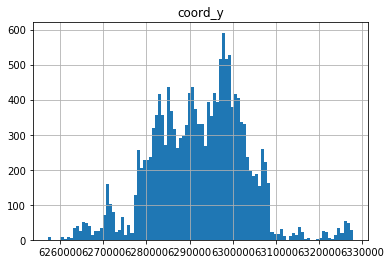

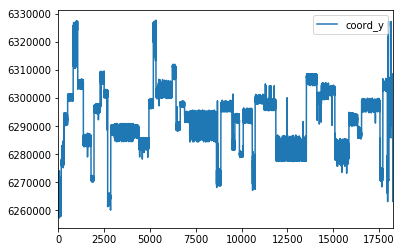

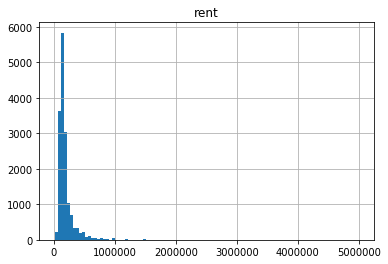

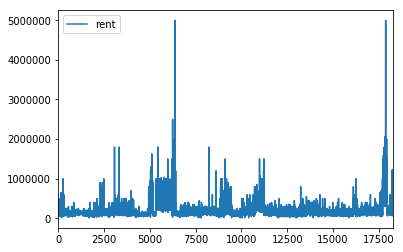

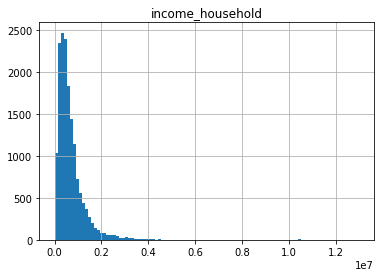

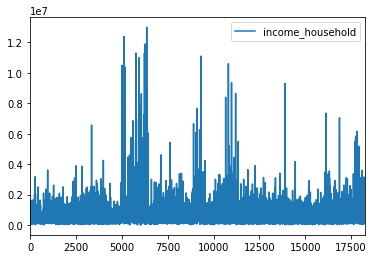

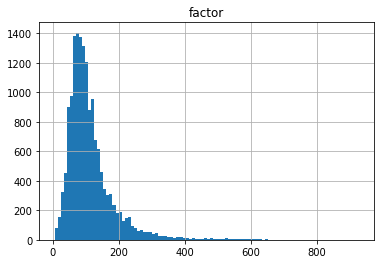

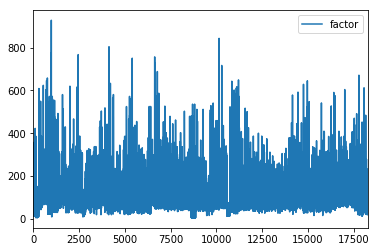

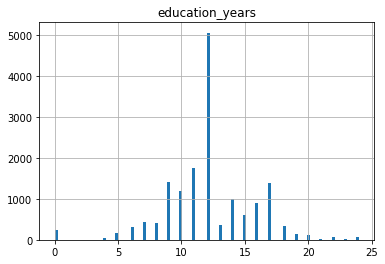

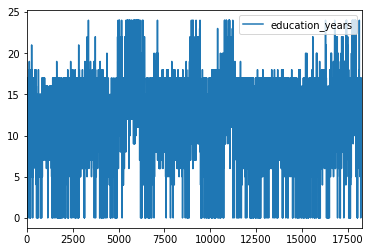

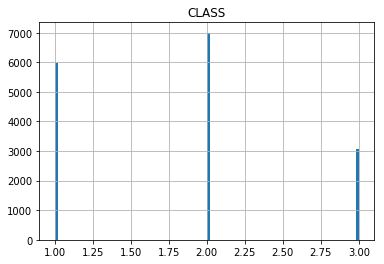

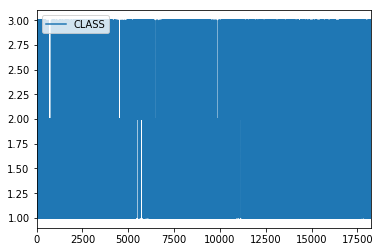

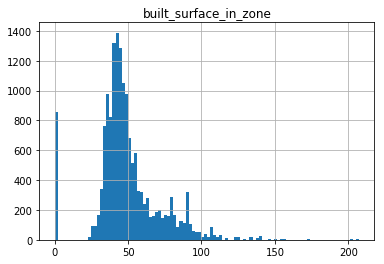

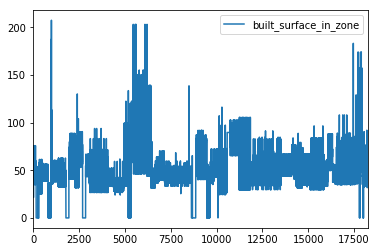

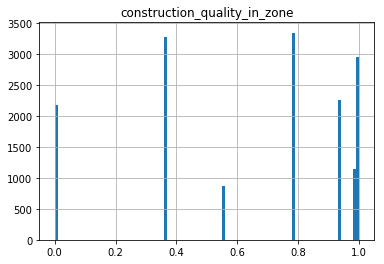

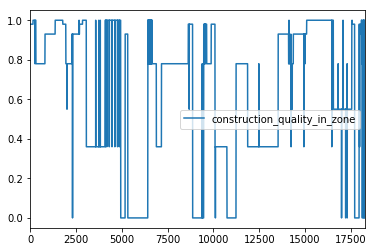

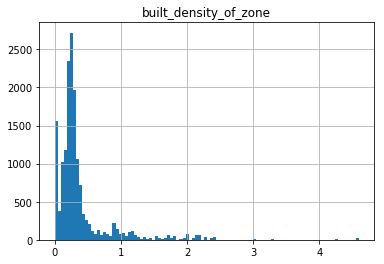

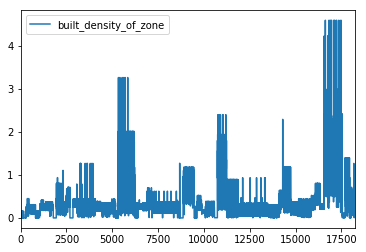

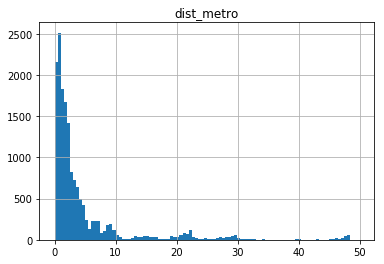

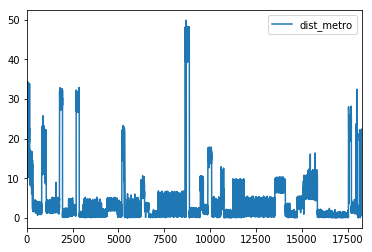

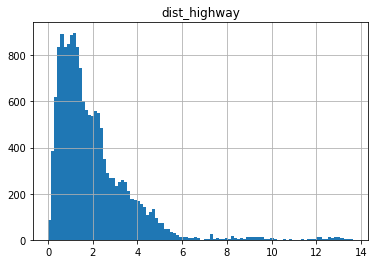

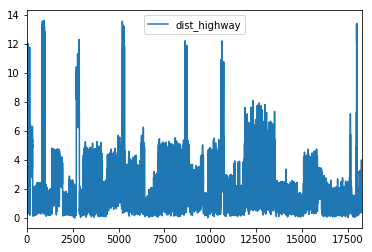

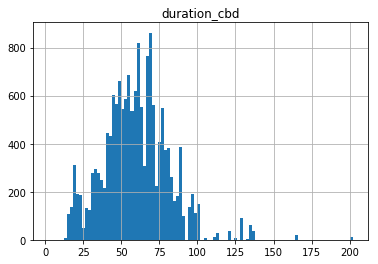

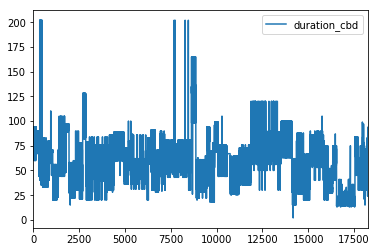

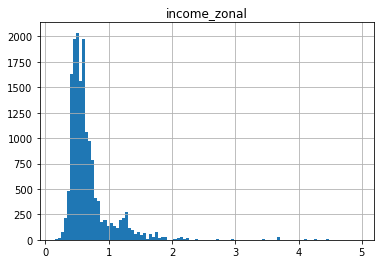

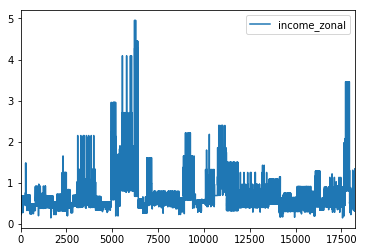

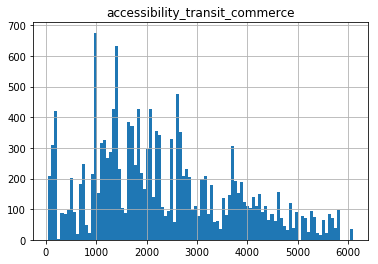

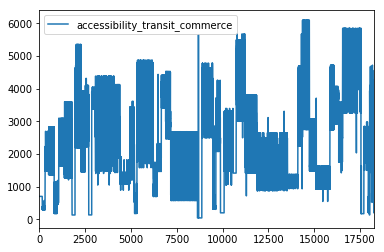

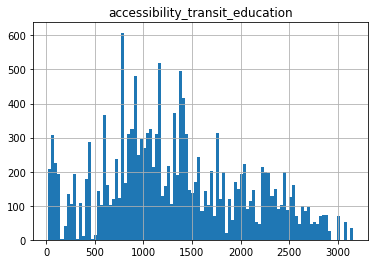

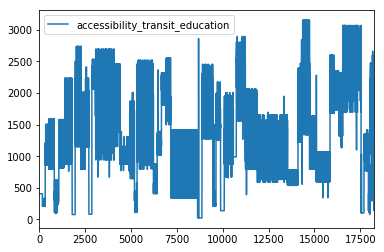

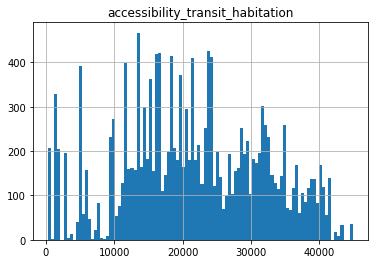

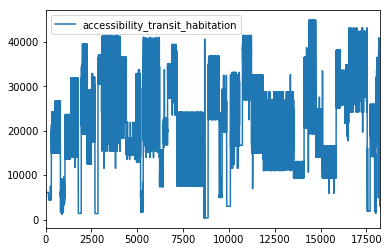

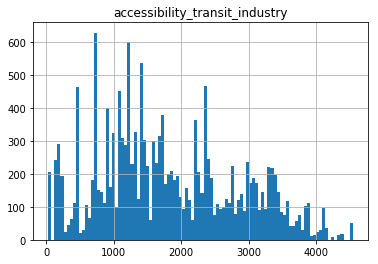

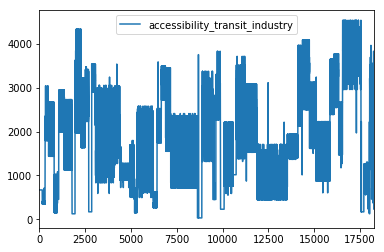

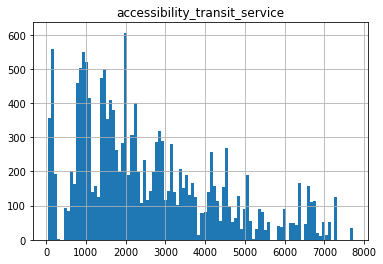

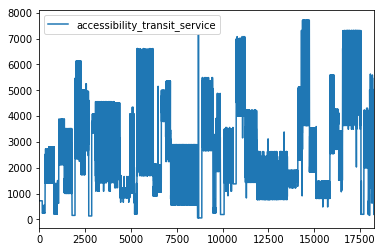

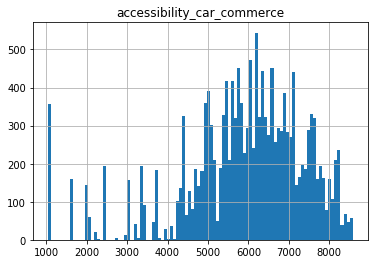

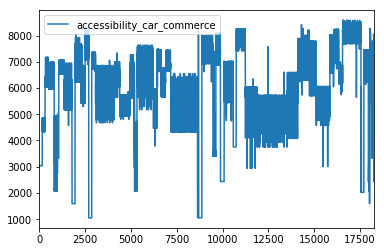

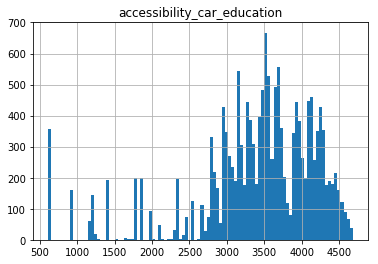

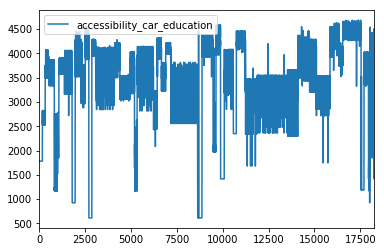

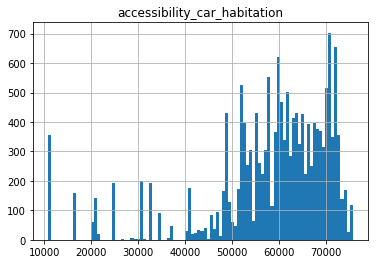

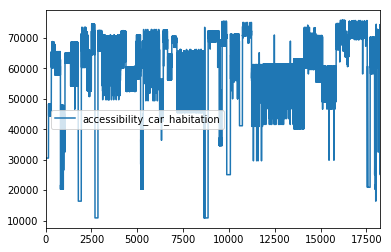

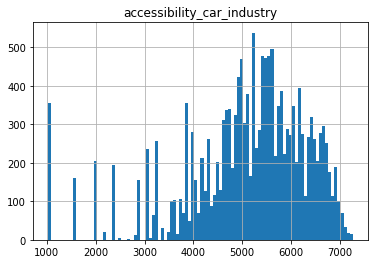

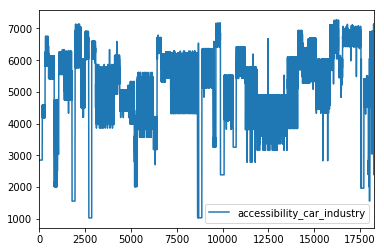

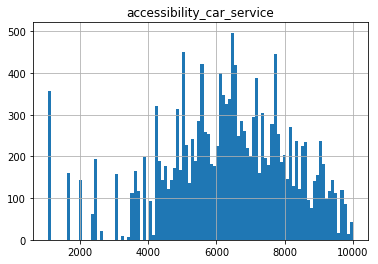

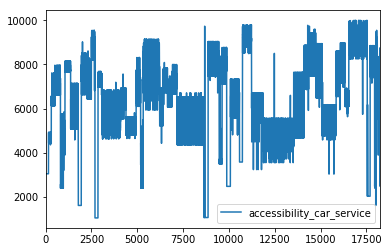

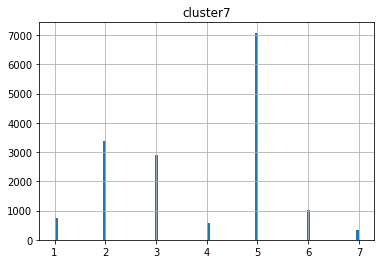

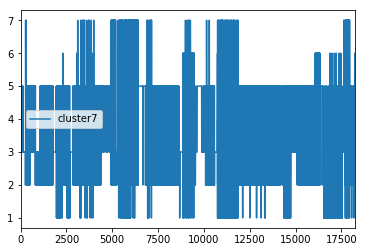

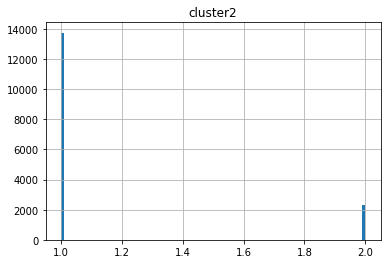

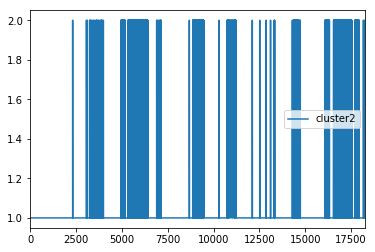

In [10]:
for i in df.columns:
    df[[i]].hist( bins=100)
    df[[i]].plot()
    


In [11]:
#print(df['accessibility_transit_commerce'].value_counts())
a=df['accessibility_transit_commerce'].value_counts()
type(a)

pandas.core.series.Series

In [12]:
# THE FEATURES WITH VISIBLE OUTLIERS
f_with_out=[
#['education_years', -99],
#['CLASS', -99],
['built_surface_in_zone' ,0],
['construction_quality_in_zone' ,0],
['built_density_of_zone' ,0],
#['duration_cbd' ,-99 ],
#['accessibility_transit_commerce' ,-99 ],
#['accessibility_transit_education', -99 ],
#['accessibility_transit_habitation', -99 ],
#['accessibility_transit_industry', -99 ],
#['accessibility_transit_service', -99] ,
#['accessibility_car_commerce', -99],
#['accessibility_car_education', -99],
#['accessibility_car_habitation', -99],
#['accessibility_car_industry', -99],
#['accessibility_car_service', -99]
]


In [13]:
for i in f_with_out:
    print('\n',i[0],'\n','occurence',(df[i[0]].value_counts())[i[1]])
    print(' spot in sorted counted values',1+df[i[0]].value_counts().index.tolist().index(i[1]),'out of',len(df[i[0]].value_counts().index.tolist()))
    print(' as percentage',(df[i[0]].value_counts())[i[1]]/len(df))

#print('occurence',(df['accessibility_transit_commerce'].value_counts())[-99])
#print(' spot in sorted counted values',df['accessibility_transit_commerce'].value_counts().index.tolist().index(-99))


 built_surface_in_zone 
 occurence 859
 spot in sorted counted values 1 out of 450
 as percentage 0.053530254876300865

 construction_quality_in_zone 
 occurence 2178
 spot in sorted counted values 5 out of 7
 as percentage 0.1357263039820527

 built_density_of_zone 
 occurence 866
 spot in sorted counted values 1 out of 420
 as percentage 0.05396647348414034


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [15]:
y=df.CLASS
X=df.drop(columns='CLASS')
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# having a look at the importance of features

Feature ranking:
1. feature 9 (0.517316) education_years
2. feature 7 (0.047332) income_household
3. feature 6 (0.044519) rent
4. feature 4 (0.034677) coord_x
5. feature 13 (0.034077) dist_metro
6. feature 0 (0.033866) household_id
7. feature 5 (0.033865) coord_y
8. feature 8 (0.033237) factor
9. feature 14 (0.033208) dist_highway
10. feature 28 (0.027283) cluster2
11. feature 11 (0.021730) construction_quality_in_zone
12. feature 16 (0.020375) income_zonal
13. feature 27 (0.014446) cluster7
14. feature 10 (0.012449) built_surface_in_zone
15. feature 12 (0.009676) built_density_of_zone
16. feature 26 (0.008933) accessibility_car_service
17. feature 15 (0.007546) duration_cbd
18. feature 21 (0.007311) accessibility_transit_service
19. feature 19 (0.007028) accessibility_transit_habitation
20. feature 3 (0.006908) sector
21. feature 17 (0.006758) accessibility_transit_commerce
22. feature 22 (0.006512) accessibility_car_commerce
23. feature 18 (0.006308) accessibility_transit_education
2

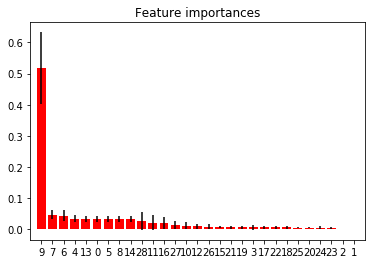

In [16]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),(X.columns.tolist())[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
[[(X.columns.tolist())[c],i]for c,i in enumerate(importances.tolist())]


[['household_id', 0.03386590420123056],
 ['excluded', 0.0],
 ['validation', 0.0],
 ['sector', 0.00690794299501779],
 ['coord_x', 0.03467729461290811],
 ['coord_y', 0.03386533535665177],
 ['rent', 0.044519246360259355],
 ['income_household', 0.04733233929578529],
 ['factor', 0.03323720392629471],
 ['education_years', 0.5173164757263636],
 ['built_surface_in_zone', 0.012449125648299746],
 ['construction_quality_in_zone', 0.021730260244273675],
 ['built_density_of_zone', 0.009675529226524445],
 ['dist_metro', 0.03407658618160265],
 ['dist_highway', 0.03320808490748597],
 ['duration_cbd', 0.007546314033675099],
 ['income_zonal', 0.020374834971813437],
 ['accessibility_transit_commerce', 0.006757597390658065],
 ['accessibility_transit_education', 0.006307552861277106],
 ['accessibility_transit_habitation', 0.007028132684618212],
 ['accessibility_transit_industry', 0.00625944372616598],
 ['accessibility_transit_service', 0.007311285860803247],
 ['accessibility_car_commerce', 0.00651222288816

First we'll convert our UTM coordinates to latitude/longitudes. Santiago is situated in Zone 19H, which we use in the UTM function from pypi.
Install geopy  API
from pip._internal import main
main(['install','geopy'])

In [ ]:
import utm

In [51]:
import utm
utm.to_latlon(335180.8019, 6266420.975, 19, 'H')
df.describe()

,household_id,excluded,validation,sector,coord_x,coord_y,rent,income_household,factor,education_years,...,accessibility_transit_service,accessibility_car_commerce,accessibility_car_education,accessibility_car_habitation,accessibility_car_industry,accessibility_car_service,cluster7,cluster2,lat,long
count,16047.000000,16047.0,16047.0,16047.000000,16047.000000,1.604700e+04,1.604700e+04,1.604700e+04,16047.000000,16047.000000,...,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000
mean,192774.951580,0.0,0.0,3.832554,344407.306079,6.292344e+06,1.857825e+05,6.802118e+05,112.447722,12.142457,...,2538.833235,5877.834918,3389.507561,58137.027416,5083.841217,6289.656531,3.895183,1.142768,-33.497080,-70.674985
std,56074.907742,0.0,0.0,1.963570,10062.340315,1.072515e+04,1.574299e+05,6.992599e+05,74.066912,3.521345,...,1768.433417,1574.764151,848.262198,13898.485134,1287.796023,1910.353107,1.522356,0.349847,0.096310,0.108851
min,100010.000000,0.0,0.0,1.000000,290184.687200,6.257255e+06,1.000000e+04,0.000000e+00,5.151379,0.000000,...,56.474950,1048.440000,613.410000,10856.450000,1030.760000,1061.180000,1.000000,1.000000,-33.810955,-71.262839
25%,144855.000000,0.0,0.0,2.000000,339191.590850,6.284869e+06,1.107465e+05,3.000000e+05,68.410446,10.000000,...,1105.525140,5081.660000,3058.770000,53163.070000,4512.550000,5091.160000,2.000000,1.000000,-33.564891,-70.730102
50%,192271.000000,0.0,0.0,4.000000,345777.638300,6.292979e+06,1.500000e+05,5.042610e+05,94.804199,12.000000,...,2048.700030,6085.000000,3522.550000,61213.100000,5277.600000,6432.510000,5.000000,1.000000,-33.491020,-70.659524
75%,237490.500000,0.0,0.0,6.000000,351460.314550,6.299452e+06,2.000000e+05,8.358965e+05,133.587433,14.000000,...,3551.267210,6961.840000,3989.490000,68308.680000,6006.600000,7683.200000,5.000000,1.000000,-33.433053,-70.599231
max,743823.000000,0.0,0.0,7.000000,363829.847200,6.327802e+06,5.000000e+06,1.300000e+07,927.142761,24.000000,...,7713.396150,8583.060000,4681.260000,75774.780000,7260.030000,10000.680000,7.000000,2.000000,-33.177605,-70.463316


In [61]:
def utm_latlon_df(df,ids=['coord_x','coord_y'],zone=19):
    coord=[utm.to_latlon(i[0],i[1], zone,'H') for i in  (df[ids].values)]
    df['lat']=[i[0] for i in coord]
    df['long']=[i[1] for i in coord]
    return df
#df.drop(columns=['lat','long'],inplace=True)

import time
start_time = time.time()
df=utm_latlon_df(df,ids=['coord_x','coord_y'],zone=19)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.4922287464141846 seconds ---


In [62]:
def get_lat(x,y):
    lat=[]
    long = []
    for i in range(0,len(df)):
        lat.append(utm.to_latlon(x[i],y[i],19,'H')[0])
        long.append(utm.to_latlon(x[i],y[i],19,'H')[1])
    return lat,long

start_time = time.time()

df['lat'], df['long'] = get_lat(df['coord_x'].values,df['coord_y'].values)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.8219516277313232 seconds ---


(16047, 32) 16047


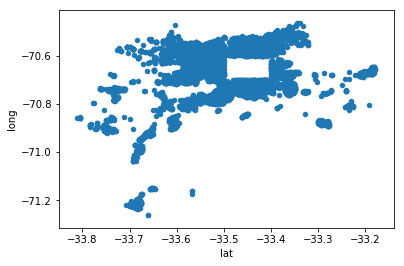

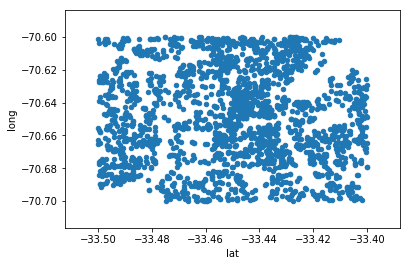

In [96]:
#test,train split
test=df[(df['long']<=-70.6) & (df['long']>=-70.7)][(df['lat']<=-33.4) & (df['lat']>=-33.5)]
test.head()
train=df.drop(index=test.index)


print(df.shape, len(test)+len(train))

train.plot.scatter('lat','long')
test.plot.scatter('lat','long')


In [103]:
def evaluate(y_true, y_pred, print_cm=False):
    # calculate and display confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    if print_cm:
        print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
        print(cm)

    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)

In [114]:
y_train=train['CLASS']
X_train=train.drop(columns='CLASS')

y_test=test['CLASS']
X_test=test.drop(columns='CLASS')

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=len(y_train.unique()))
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(random_state=42,C=0.5)

model.fit(X_train, y_train)

# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("- Train set results:")
evaluate(y_train, y_pred_train)
print("- Test set results:")
evaluate(y_test, y_pred_test)

- Train set results:
accuracy: 0.7412150089338893
precision: 0.7552222817354044
recall: 0.7228298017771702
f1 score: 0.7386710905439623
- Test set results:
accuracy: 0.46692160611854683
precision: 0.48
recall: 0.4591304347826087
f1 score: 0.4693333333333333


In [102]:
y=train['CLASS']
X=train.drop(columns='CLASS')


neigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Then we use the latitude and longitudes to find our communes for each household. This can be done using reverse geocoding with the geopy package.

from pip._internal import main
main(['install','utm'])

In [20]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="DS_project")
location = geolocator.reverse("-33.72944384525169, -70.77903469037606")
def get_location(x,y):
    location = []
    for i in range(0,len(df)):
        location.append(geolocator.reverse(str(x[i])+", " +str(y[i])))
    return location

df['commune'] = get_location(df['lat'].values,df['long'].values)

KeyboardInterrupt: 

Now that we have the communes for each of the locations, we can start getting statistics from an API called datachile: Let's try first with their example: 


In [ ]:
from datachile import ChileCube

client = ChileCube()
query = client.get( "exports", { "drilldowns": [ ["Date", "Year"], ["Destination Country", "Country", "Country"] ], "measures": ["FOB US"], "cuts": [ { "drilldown": ["Date", "Year"], "values": [2012, 2013, 2014] } ], "parents": True } )
print(query)

That did not work. Unfortunately there seems to be a a bug in the API, and therefore we have to download the data from the website. Luckily they are easily available, and we will download the following datasets: Population prediction, Production


In all the dataset indexes, the communes are not by name, but rather by ID. Thankfully, Datachile has a dataset containing the communes and their respective IDs. Let's use this to get the ID for the communes in our large data set.

In [ ]:
communes_df = pd.read_csv("commune_data.csv")
communes_df = communes_df[communes_df['region_name'] == 'Región Metropolitana Santiago']

In [ ]:
communes_df.head()

Now that we have the communes, we can start attaining more data, to help our prediction. The feature importance graph showed that education was important. Let's have a deeper look into the education. Perhaps can the performance of the schools in the commune help  us with the prediction.

In [ ]:
school_df = pd.read_csv("datos_rendimiento.csv")

del school_df['institution_id'], school_df['administration_id'], school_df['rural_id'],school_df['teaching_id'], school_df['sex_id']

It would be useful to convert the dataset, so that we get the commune average per year.

In [ ]:
def get_commune_information(data):
    new_school = pd.DataFrame()
    for i in communes_df['comuna_datachile_id'].values:
        new_school = new_school.append(data[data.comuna_datachile_id==i])
    return new_school


In [ ]:
new_school = get_commune_information(school_df)


In [ ]:
def average_scores(data):
    avg_scores = pd.DataFrame()
    for i in years:
        new_data = data[data.year==i]
        for j in communes_df['comuna_datachile_id'].values:
            avg_scores = avg_scores.append(new_data[new_data.comuna_datachile_id == j].mean(), ignore_index =True)
    return avg_scores

years = [i for i in range(2002,2016)]

In [ ]:
average_df = average_scores(new_school)



Let's have a look at the population predictions, and see if we can merge this with the school dataset

In [ ]:
population_df = pd.read_csv("population_2005_2020.csv")

In [ ]:
population_df = get_commune_information(population_df)


In [ ]:
def average_population(data,year):
    df = pd.DataFrame()
    data = data[data['year'] == year]
    comuna_id = []
    population = []
    for i in communes_df['comuna_datachile_id'].values:
        dat = data[data['comuna_datachile_id']==i]
        population.append(dat['count'].sum())
        comuna_id.append(i)
    df['comuna_datachile_id'] = comuna_id
    df['population'] = population
    return df



In [ ]:
population_2019_df = average_population(population_df,2019)